# Data Cleaning Self Guide 

 This is self guide for data cleaning. This data cleaning tutorial orignilallly from Dataquest.io "Data Cleaning Walktrogh" course. The dataset we used is star wars fan survey.  

first we import pandas library and read "star_wars.csv" with ISO-8859-1 encoding

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

To start data cleaning we have to see every column and inspect what is the data type. To see the first five all row we use .head() instance

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


To review the columns we can check all the columns with .columns

In [38]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

In [3]:
star_wars["RespondentID"].notnull().value_counts()

True     1186
False       1
Name: RespondentID, dtype: int64

Data cleaning is perform to make the data can be proces and visualize to perform future analysis. As we can see, In star_wars dataset there is a row without RespondendentID so we have to eliminate this row 

In [4]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [5]:
star_wars["RespondentID"].notnull().value_counts()

True    1186
Name: RespondentID, dtype: int64

To perform anlaysis we have to use boolean value when there is a two opposite value like yes or no. In "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" there is yes or no value. We have to change this string to boolean value True and False  

In [8]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In column 4 to 9 that tell us star wars movie that fan have seen from eps I to eps VI. This row is fill with the title of episodes so we have to change to boolean value. Same as before we can use map to change the entire row 

In [12]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [13]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


We want to change the column name so the name will be more informative 

In [14]:

star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
})

In [15]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In column 9 to 14 there is the score for each star wars episode but the type is string. We want to change the type to float using astype(float) and change the columns name 

In [17]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [18]:
star_wars = star_wars.rename(columns ={ 
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
"Unnamed: 10":"ranking_2",
"Unnamed: 11":"ranking_3",
"Unnamed: 12":"ranking_4",
"Unnamed: 13":"ranking_5",
"Unnamed: 14":"ranking_6"})

In [20]:
star_wars[star_wars.columns[9:15]].head() 

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


The rank columns is ready to analysis. We can see the mean for each episode rank and save it to a dictionary 

In [21]:
rank={}
for col in star_wars.columns[9:15]:
    rank[col] = star_wars[col].mean()

In [22]:
print(rank)

{'ranking_1': 3.7329341317365268, 'ranking_2': 4.087320574162679, 'ranking_3': 4.341317365269461, 'ranking_4': 3.272727272727273, 'ranking_5': 2.513157894736842, 'ranking_6': 3.047846889952153}


and we can built a bar chart 

<Container object of 6 artists>

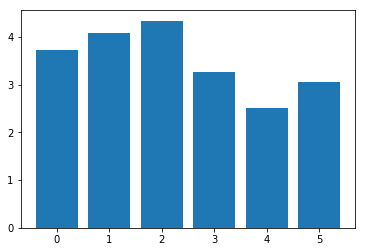

In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean())

With gender column we can check what is the episode is mostly liked by gender and the average rank for each episodes 

In [25]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]

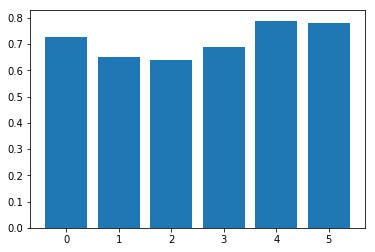

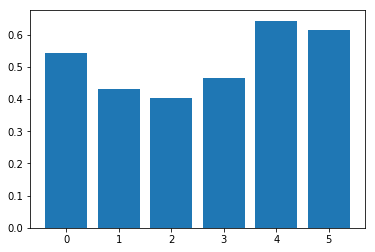

In [26]:
plt.bar(range(6),males[males.columns[3:9]].mean())
plt.show()
plt.bar(range(6),females[females.columns[3:9]].mean())
plt.show()

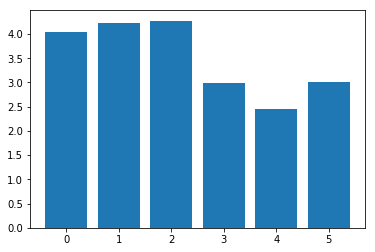

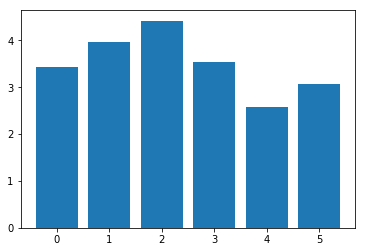

In [27]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

In [34]:
star_wars[["Education","Location (Census Region)","Which character shot first?"]].head()

,Education,Location (Census Region),Which character shot first?
1,High school degree,South Atlantic,I don't understand this question
2,Bachelor degree,West South Central,NaN
3,High school degree,West North Central,I don't understand this question
4,Some college or Associate degree,West North Central,I don't understand this question
5,Some college or Associate degree,West North Central,Greedo


In [44]:
star_wars["Education"].notnull().value_counts()

True     1036
False     150
Name: Education, dtype: int64

In [43]:
star_wars["Location (Census Region)"].notnull().value_counts()

True     1043
False     143
Name: Location (Census Region), dtype: int64

In [42]:
star_wars["Which character shot first?"].notnull().value_counts()

True     828
False    358
Name: Which character shot first?, dtype: int64

In [45]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [65]:
star_wars["Unnamed: 16"].value_counts().sum()

831

In [69]:
star_wars["Unnamed: 16"].isnull().value_counts()

False    831
True     355
Name: Unnamed: 16, dtype: int64